In [4]:
import sympy
from sympy import oo
import numpy as np
from tqdm import tqdm
from time import sleep

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
for i in tqdm(range(1000), desc="hello"):
    sleep(0.01)

hello: 100%|██████████| 1000/1000 [00:10<00:00, 93.06it/s]


求解如下极限

$$ \lim_{x \to \infty} \frac{sinx}{x} \quad $$

In [2]:
x = sympy.Symbol('x')
f = sympy.sin(x) / x
sympy.limit(f, x, oo)

0

$$ \lim_{x \to 1} \frac{x^2-1}{x-1} \quad $$

In [8]:
x = sympy.Symbol('x')
f = (x**2 - 1) / (x - 1)
sympy.limit(f, x, 1)

2

$$ \lim_{x \to 0} \frac{sinx}{3x+x^3} \quad $$

In [9]:
f = sympy.sin(x) / (3 * x + x**3)
sympy.limit(f, x, 0)

1/3

求解函数$$y=arcsin\sqrt{sinx}$$的导数

In [16]:
from sympy.abc import x, y, z, f

sympy.diff(sympy.asin(sympy.sqrt(sympy.sin(x))))

cos(x)/(2*sqrt(1 - sin(x))*sqrt(sin(x)))

求$$f(x,y)=x^2+3xy+y^2$$在点（1，2）处的偏导数

In [17]:
from sympy import *
from sympy.abc import x,y,z,f

In [18]:
f = x**2 + 3 * x * y + y**2
diff(f, x)

2*x + 3*y

In [19]:
diff(f, y)

3*x + 2*y

In [20]:
fx = diff(f, x)

In [21]:
fx.evalf(subs={x: 1, y: 2})

8.00000000000000

In [22]:
fy = diff(f, y)

In [23]:
fy.evalf(subs={x: 1, y: 2})

7.00000000000000

In [6]:
def Fun(x, y):
    return x - y + 2 * x * x + 2 * x * y + y * y


def PxFun(x, y):
    return 1 + 4 * x + 2 * y


def PyFun(x, y):
    return -1 + 2 * x + 2 * y

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


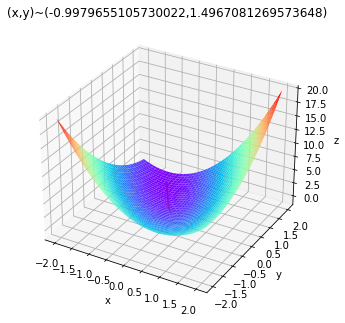

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.mgrid[-2:2:40j, -2:2:40j]
Z = Fun(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="rainbow")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

step = 0.0008
x = 0
y = 0
tag_x = [x]
tag_y = [y]
tag_z = [Fun(x, y)]
new_x = x
new_y = y
Over = False
while Over == False:
    new_x -= step * PxFun(x, y)
    new_y -= step * PyFun(x, y)
    if Fun(x, y) - Fun(new_x, new_y) < 7e-9:
        Over = True
    x = new_x
    y = new_y
    tag_x.append(x)
    tag_y.append(y)
    tag_z.append(Fun(x, y))

ax.plot(tag_x, tag_y, tag_z, 'r')
plt.title('(x,y)~(' + str(x) + "," + str(y) + ')')
plt.show()